# Heart Disese Classifier
---

Procedemos a importar las librerias necesarias para desarrollar el modelo.   En este caso utilizaremos seaborn para desarrollar las gráficas.

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

Cargamos el dataset e imprimimos las primeras columnas de datos.

In [3]:
url = 'https://raw.githubusercontent.com/amankharwal/Website-data/master/heart.csv'
heart = pd.read_csv(url)
print(heart.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


Verificamos si existen datos nulos para iniciar la limpieza de datos, en este caso no existen datos nulos.

In [4]:
print(heart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


Aquí podemos ver unas gráficas de la edad de los pacientes contra sus niveles de colesterol en base a su sexo (donde 0, representa femenino) y si presenta enfermedad en el corazón(target=1).

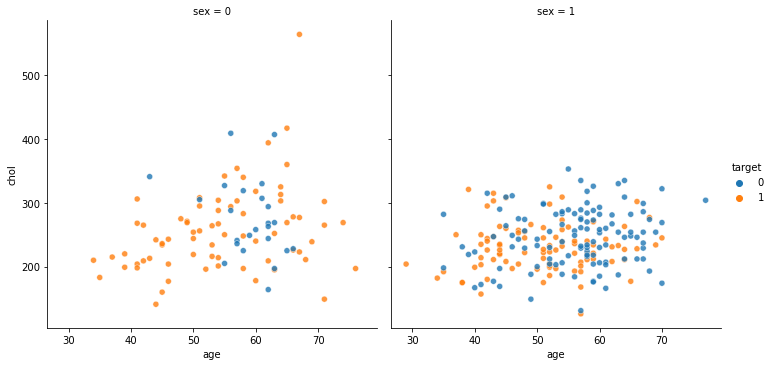

In [5]:
sns.relplot(x = 'age', y = 'chol', data = heart, hue = 'target', col = 'sex', alpha = 0.8)

Utilizaremos la función seaborn displot para poder conocer la distribución de nuestro set de datos.

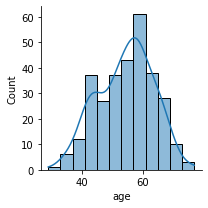

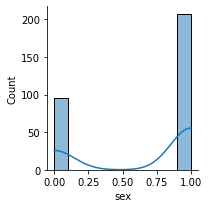

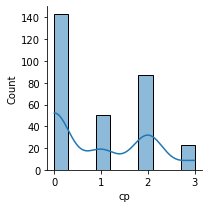

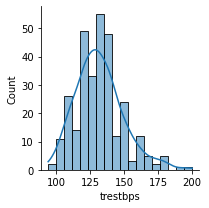

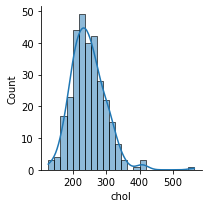

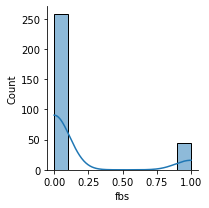

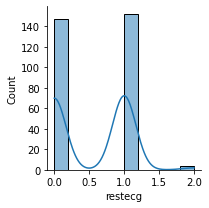

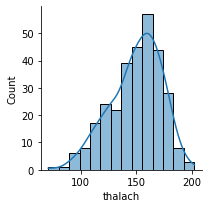

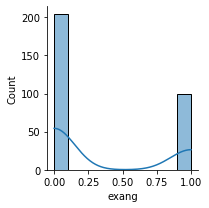

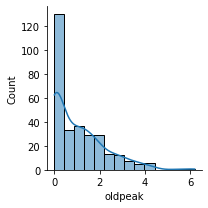

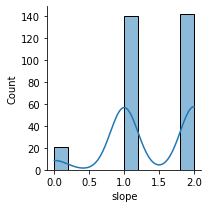

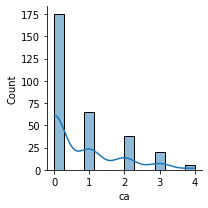

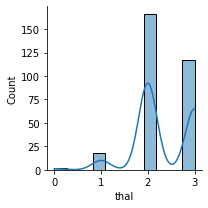

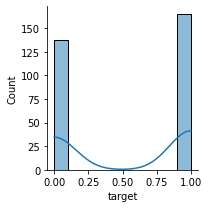

In [6]:
for var in heart.columns:
    axes = sns.displot(data= heart, x=var, kde = True, alpha = 0.5, height = 3)

Buscamos la correlación entre las variables y las graficamos en un mapa de calor.

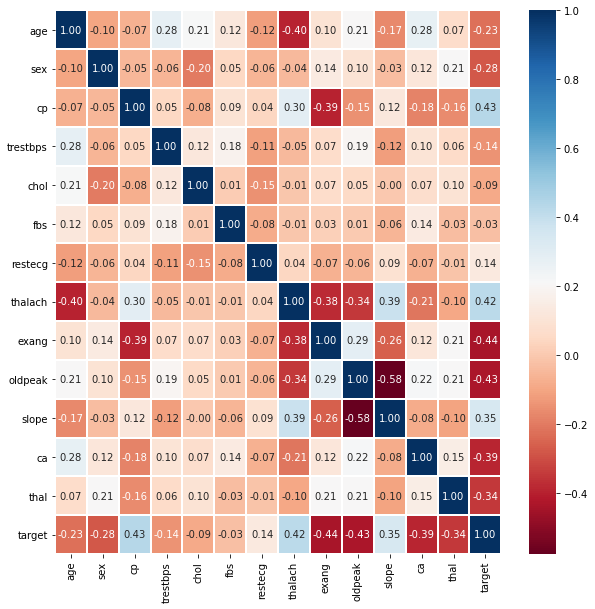

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(heart.corr(), annot = True, fmt = '.2f', cmap = 'RdBu', linewidth = 1)

Ahora procedemos a separar las variables de entrenamiento y la prueba, utilizaremos 30% de nuestros datos para verificar el modelo.   He dicidido utilizar una regresión logistica para crear el modelo, se utilizo solver de ‘liblinear’ ya que es mejor cuando el set de datos es pequeño.

In [8]:
y = heart['target'].values
X = heart.drop('target', axis = 1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
lgr = LogisticRegression(solver = 'liblinear')

In [9]:
lgr.fit(X_train, y_train)
acc_score = lgr.score(X_test, y_test)
y_pred = lgr.predict(X_test)
print(acc_score)

0.9340659340659341


Anexamos los resultados de nuestro modelo para poder verificar si la predicción de nuestro modelo es acertada

In [10]:
heart_2 = heart.copy()
prediction = lgr.predict(X)
heart_2['model_target'] = prediction
model_correct = prediction == heart['target']
heart_2['pred_correcta'] = model_correct
print(heart_2)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  model_target  pred_correcta  
0        0   0     1       

Al graficar los mismos datos, podremos ver de manera grafica donde falla el modelo.

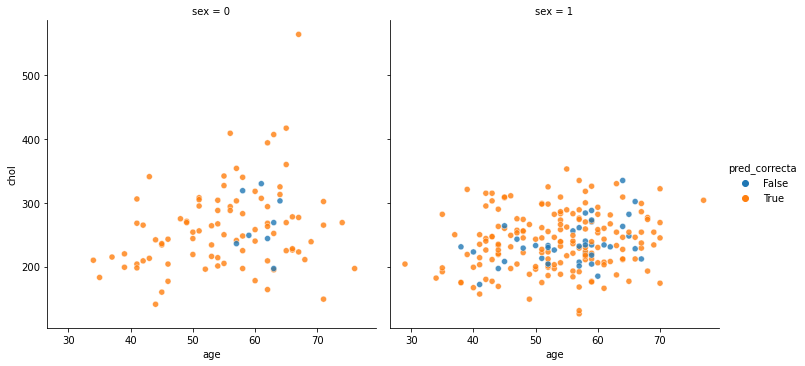

In [11]:
sns.relplot(x = 'age', y = 'chol', data = heart_2, hue = 'pred_correcta', col = 'sex', alpha = 0.8)

Se imprime la reporte de clasificacion para juzgar el desempeño del modelo.

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.92      0.96      0.94        48

    accuracy                           0.93        91
   macro avg       0.94      0.93      0.93        91
weighted avg       0.93      0.93      0.93        91

